# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

---
Assumtion: 
$A\in \mathbb{C}^{m\times n}$, 
$X\in \mathbb{C}^{n\times p}$, 
$B\in \mathbb{C}^{p\times q}$.\
Also, $A = [\mathrm{a}_1, \mathrm{a}_2, \dots, \mathrm{a}_n]$.\
Also, $B = [\mathrm{b}_1, \mathrm{b}_2, \dots, \mathrm{b}_p]^T$. 
So a_i is an i'th column of A and b_j is the j'th row of B.

First, let us discuss the regular columnwise vectorization.\


$\displaystyle \mathrm{vec}(AXB) = \sum\limits_{i=1}^n \sum\limits_{j=1}^p x_{ij} \mathrm{vec}(\mathrm{a}_i \mathrm{b}_j) $. \
Given that  $\mathrm{vec}(\mathrm{a}_i \mathrm{b}_j)$ is a vectorized matrix of a size $m\times q$, where in a non-vectorizec matrix each row is $a_ij b_j$, we can rewrite $\mathrm{vec}(\mathrm{a}_i \mathrm{b}_j) = \mathrm{b}^T_j\otimes \mathrm{a}_i)$ \
$\displaystyle \mathrm{vec}(AXB) = \sum\limits_{i=1}^n \sum\limits_{j=1}^p x_{ij} \mathrm{vec}(\mathrm{a}_i \mathrm{b}_j) = \sum\limits_{i=1}^n \sum\limits_{j=1}^p x_{ij} (\mathrm{b}_j^T \otimes \mathrm{a}_i)  = \sum\limits_{j=1}^p (\mathrm{b}_j^T \otimes A)\mathrm{x}_j = (B^T \otimes A)\mathrm{vec}(X)$ QED.


If we elect to do a rowwise vectorization, we summon a commutatuion matrix. Vectorizing rowwise is verbatim vectorizing the transpose matrix columnwise. 

The connection with the commutatuion matrix K: $\mathrm{vec}A = K \mathrm{vec}A^T$. So what changes is: 

$\displaystyle \mathrm{vec}(AXB) = (B^T \otimes A)K^T \mathrm{vec}(X)$ where K is commutation matrix:

In [75]:
""" https://math.stackexchange.com/questions/307299/kronecker-product-and-the-commutation-matrix """
import numpy as np

def commutation_mat(X):
    m, n = X.shape
    K = np.zeros((n*m, n*m))
    for i in range(m):
        for j in range(n):
            K[i + m*j, j + n*i] = 1
    return K

In [81]:
x = np.array([[1,4], [2, 5], [3, 6]])
print(x)
print(x.ravel(order='f'))
print(commutation_mat(x).T.dot(x.ravel(order='f')))

[[1 4]
 [2 5]
 [3 6]]
[1 2 3 4 5 6]
[1. 4. 2. 5. 3. 6.]


---
**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

---
Assuming: \
$A\in \mathbb{C}^{m\times n}$ and  
$B\in \mathbb{C}^{p\times q}$, the complexity of a naive computation would be $O(mnpq)$.\

If matrices A and B are square and X is $n^2\times 1$, the complexity is $O(n^4)$.

We can spped thing up if we use $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$. 

So, if we "matrixize" the vector x into an n-ny-n matrix, we can compute `B @ mat(x)` and then `(B @ mat(x)) @ A^T`, each step in $O(n^3)$ (and in general as well) with avaliability of speeding up with Strassen. 

---

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

---
[nice article](https://nhigham.com/2020/08/25/what-is-the-kronecker-product/)\
The matrix $A\otimes I + I \otimes B$ is called a Kronecker sum and is defined for squre matrices.

$ (A\otimes I + I \otimes B)(x \otimes y)  = Ax \otimes y + x \otimes By = \lambda_{A} x \otimes y + x \otimes \lambda_{B}y = (\lambda_{A} + \lambda_{B})(x \otimes y) \Rightarrow $\
for a Kronecker sum, each eigenvalue is a sum of eigen of matrix B with eigenvalues of A, i.e.:

$
\lambda_{1B} + \lambda_{1A},\ \ \  \lambda_{1B} + \lambda_{2A},\ \ \  \cdots,\ \ \  \lambda_{1B} + \lambda_{nA} \\
\lambda_{2B} + \lambda_{1A},\ \ \  \lambda_{2B} + \lambda_{2A},\ \ \  \cdots,\ \ \  \lambda_{2B} + \lambda_{nA} \\ 
\dots \dots \\
\lambda_{pB} + \lambda_{1A},\ \ \  \lambda_{pB} + \lambda_{2A},\ \ \  \cdots,\ \ \  \lambda_{pB} + \lambda_{nA}
$

---

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [17]:
import numpy as np
import scipy.sparse.linalg as spla
import scipy.sparse 
from math import log, ceil
from tqdm import tqdm

d = [i / 1000 for i in range(1,1001)]
d.append(1000)

A = np.diag(d)

x_0 = np.zeros(1001)
f = np.random.rand(1001)

x_groundtruth = np.linalg.solve(A, f)

In [18]:
eivals = np.linalg.eigvals(A)
l_max = np.real(max(eivals))
l_min = np.real(min(eivals))

cond_a = l_max / l_min
print(f'the condition number is {cond_a}')
print(f'the lowest eigenvalue is {l_min} while the largest is {l_max}')

the condition number is 1000000.0
the lowest eigenvalue is 0.001 while the largest is 1000.0


---
**Richardson iteration**

The matrix is diagonal, so the eigenvalues are diagonal elements.

$\displaystyle \mathrm{cond}(A) = \frac {\lambda_{\mathrm{max}}}{\lambda_{\mathrm{min}}}$ for $A = A^H$ (which is true as mat is diagonal and real-valued)

$\displaystyle \tau_{opt}= \frac{2}{\lambda_{min}+\lambda_{max}} = 0.002$

$e_k = x_k - x_* $, where $x_*$ is a solution and $x_k$ is an approximation of the so;ution after the k-th iteration of the method. $e_k$ is an error. 

$\displaystyle e_k \leq q^k e_0$, where $\displaystyle q = \frac{\mathrm{cond}A - 1}{\mathrm{cond}A + 1}$

As $\displaystyle \frac{ e_0 }{\Vert x_* \Vert_2} q^k \ge \frac{ e_k }{\Vert x_* \Vert_2}$ and the r.h.s. being the relative error, we substitude 1e-4 and get that $\displaystyle q^k \ge \frac{\Vert x_* \Vert_2}{e_0} 10^{-4}$.

Now assume $\exists x_0$ , then $e_0  = \Vert x_0 -  x_*\Vert_2$

$k \ge\log_q 10^{-4}  + \log_q \Vert x_* \Vert_2 - \log_q \Vert x_0 - x_* \Vert_2 $

In [19]:
q = (cond_a - 1)/(cond_a + 1)

k = log(1e-4, q) + \
    log(np.linalg.norm(x_groundtruth), q) - \
    log(np.linalg.norm(x_0 - x_groundtruth), q)
print(f'The estimate of amt of iterations is {ceil(k)}')

The estimate of amt of iterations is 4605171


In [21]:
def richardson(A, f, x_0, l_max, l_min, error_threshold):
    x_gt = np.linalg.solve(A, f)
    t_opt = 2 / (l_max + l_min)
    x = x_0
    errors = []
    i = 0
    while True:
        x = x - t_opt * (A.dot(x) - f)
        error = np.linalg.norm(x - x_gt) / np.linalg.norm(x_gt)
        if error <= error_threshold:
            break
        errors.append(error)
        # if i % 1000 == 0:
        #     print(f'yet another 1kth iter, error is {error}')
    return x, errors

result_rich, residual_rich = richardson(A, f, x_0, l_max, l_min, 1e-4)

print(f'Richardson iteration took {residual_rich.__len__()} iterations')

"""
i won't wait for 5 million iterations, sorry not sorry, 
you may minuspoint me 
"""

Richardson iteration took 4586652 iterations


"\ni won't wait for 5 million iterations, sorry not sorry, \nyou may minuspoint me \n"

---
**Chebyshev iteration**

$e_{k+1} \leq C q^{k} e_0$

$\displaystyle q = \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)} + 1} = 0.9980$

$e_0 = \Vert x_0 - x_*\Vert_2$

$e_k \leq C q^{k-1} e_0$

$\log_q{e_k} \leq \log_q{C} +  \log_q{q^{k-1}} + \log_q{e_0}$

$\log_q{e_k} - \log_q{C} - \log_q{e_0} \leq k-1 $

$k \approx \log_q 10^{-4} + \log_q \Vert x_* \Vert_2 - \log_q {\Vert x_0 - x_* \Vert_2} - \log_q {C}$

In [22]:
q = (cond_a**0.5 - 1) / (cond_a**0.5 + 1)
log(1e-4, q)

4605.168650930853

In [23]:
k = log(1e-4, q) + \
    log(np.linalg.norm(x_groundtruth), q) - \
    log(np.linalg.norm(x_0 - x_groundtruth), q)
print(f'The estimate of amt of iterations for chebyshev iterations is {ceil(k)} (с точностью до константы)')

The estimate of amt of iterations for chebyshev iterations is 4606 (с точностью до константы)


[source of the code](https://en.wikipedia.org/wiki/Chebyshev_iteration)

In [27]:
def chebiter(A, f, x_0, l_max, l_min, error_threshold):
    x_gt = np.linalg.solve(A, f)
    x = x_0
    precond_n = np.eye(A.shape[0])
    
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    
    errors = []
    i = 0
    
    resid = f - A.dot(x)
    
    while True:
        z = np.linalg.solve(precond_n, resid)
        if i == 0:
            p = z
            alpha = 1/d
        elif i == 1:
            beta = (1/2) * (c * alpha) ** 2
            alpha = 1/(d - beta/alpha)
            p = z + beta * p 
        else:
            beta = (c * alpha/2) ** 2
            alpha = 1/(d - beta / alpha)
            p = z + beta * p

        x = x + alpha * p
        resid = f - A.dot(x)
        error = np.linalg.norm(x_gt - x)/np.linalg.norm(x_gt)
        errors.append(error)
        if error <= error_threshold:
            break
        i += 1
    return x, errors

_, residual_cheby = chebiter(A, f, x_0, l_max, l_min, 1e-4)

print(f'Chebyshev iteration took {residual_cheby.__len__()} iterations')

Chebyshev iteration took 4942 iterations


---
**Cgrad**

[page 8](http://www.mat.uniroma2.it/~tvmsscho/Rome-Moscow_School/2012/files/T120910_.pdf)

$\displaystyle \frac{10^{-4}}{e_0} \leq  \gamma \Big(\frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}\Big)^{k}$

$\displaystyle  k \leq \frac{1}{2} \sqrt{\frac{\lambda_{n}}{\lambda_{1}}}(\log{2} - \log{\frac{e_k}{e_0} }) \approx 2000$

In [29]:
def cgrad(A, f, x, error_threshold):
    r = f - A.dot(x)
    p = r
    
    rs = r.T.dot(r)
    
    i = 0
    errors = []
    
    while True:
        Ap = A.dot(p)
        gamma = rs / np.dot(p.T, Ap)
        x = x + gamma*p
        r = r - gamma*Ap
        rsnew = r.T.dot(r)
        error = np.sqrt(rsnew)
        
        errors.append(error)
        if error < error_threshold:
            break
        
        p = r + (rsnew/rs)*p
        rs = rsnew
        i += 1
    return x, errors



_, residual_cgrad = cgrad(A, f, x_0, 1e-4)
print(f'Cgrad took {residual_cgrad.__len__()} iterations')

Cgrad took 164 iterations


## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

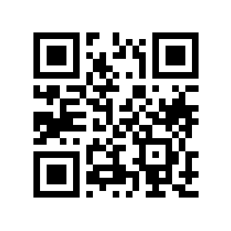

In [1]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [26]:
import numpy as np
from scipy.sparse.linalg import LinearOperator
import scipy.sparse.linalg as spla
from scipy import signal
from numpy import fft
from math import ceil

def generate_T(size, alpha):
    x_idx = np.zeros((2*size - 1, 2*size - 1))
    y_idx = np.zeros((2*size - 1, 2*size - 1))

    x_idx[0, :] = np.append(np.array([j for j in range(size)]), 
                            [-(size-j) for j in range(1,size)])
    for i in range(2*size - 1):
        x_idx[i] = x_idx[0]
        y_idx[i] = [x_idx[0,i] for _ in range(2*size-1)]
    
    T = (alpha/np.pi)*np.exp(-alpha*(x_idx**2 + y_idx**2))
    return T

def T_matvec(x, aplha):
    size = ceil(x.shape[0]**0.5)
    
    T = generate_T(size, alpha)

    x = x.reshape(size, size)
    x = np.pad(x,(0,size-1),'constant',constant_values=(0, 0))
    
    result = np.fft.ifft2(np.fft.fft2(T)*np.fft.fft2(x))
    result = result[:size,:size].reshape(1, size**2)
    return result 

alpha = 0.001
T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))

array([[0.00031831, 0.00031799, 0.00031704, ..., 0.00031546, 0.00031704,
        0.00031799],
       [0.00031799, 0.00031767, 0.00031672, ..., 0.00031514, 0.00031672,
        0.00031767],
       [0.00031704, 0.00031672, 0.00031577, ..., 0.0003142 , 0.00031577,
        0.00031672],
       ...,
       [0.00031546, 0.00031514, 0.0003142 , ..., 0.00031263, 0.0003142 ,
        0.00031514],
       [0.00031704, 0.00031672, 0.00031577, ..., 0.0003142 , 0.00031577,
        0.00031672],
       [0.00031799, 0.00031767, 0.00031672, ..., 0.00031514, 0.00031672,
        0.00031767]])

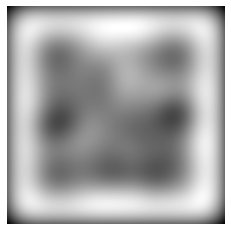

In [27]:
blur_qr_vec = T.dot(x.ravel())

blurred_qr_img = np.reshape(blur_qr_vec, (x.shape[0],x.shape[0]), order='C').real
plt.imshow(blurred_qr_img, cmap="gray")
plt.axis("off")
ttt = generate_T(ceil(x.shape[0]**0.5), alpha)
ttt

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**
1. The matrix T is hermitian as it is real (so T.conj() == T) and it is symmetric (so T.T == T). 
2. The matrix being positive-definite guarantees that x.T T x > 0. This means, that\ 
    a) the A-norm is real\
    b) there are no divisions by zero in iterations of CGrad\
    c) no more ideas

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .

In [5]:
from tqdm.auto import tqdm

def solve_sparse(A, b,tol):
    def callback(xk):
        nonlocal niters
        niters += 1

    niters = 0
    x,_ = spla.cg(A, b, tol=tol, callback=callback)
    return x, niters


alpha_list = []; tolerance_list = []; err_list = []; niter_list = []

alphas = [0.1,1e-2,1e-3]
tolerances = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

x_vect = x.ravel()
for alpha in alphas:

    T_alpha = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))    
    y = T_alpha.dot(x_vect)

    for tolerance in tolerances:
        x_deconv, niter  = solve_sparse(T_alpha, y, tolerance)
        err = np.linalg.norm(x_vect - x_deconv)/np.linalg.norm(x_vect)
        
        alpha_list.append(alpha); tolerance_list.append(tolerance)
        err_list.append(err); niter_list.append(niter)

In [13]:
print('alpha\ttolerance\terror\t\t\titerations')
for i in range(len(alpha_list)):
    print(f'{alpha_list[i]}\t{tolerance_list[i]}\t\t{err_list[i]}\t{niter_list[i]}')

alpha	tolerance	error			iterations
0.1	0.001		0.12847145208381036	11
0.1	0.0001		0.10191431361088142	46
0.1	1e-05		0.09586763786282117	136
0.1	1e-06		0.07218518439293455	788
0.1	1e-07		0.06678284312615602	2375
0.01	0.001		0.2151919309181163	18
0.01	0.0001		0.20193916147301988	53
0.01	1e-05		0.19717958164105984	168
0.01	1e-06		0.1948657553232079	565
0.01	1e-07		0.189573233748358	2532
0.001	0.001		0.4362717966163373	13
0.001	0.0001		0.4197953755819653	50
0.001	1e-05		0.4000547112833053	163
0.001	1e-06		0.3806235891994159	529
0.001	1e-07		0.36962552076249455	1593


- Comment on the results: 

    1) why the relative error does not converge to zero?\
        - Because no numerical iterative method, working with floats, can converge to zero due to\
            a) error accumulation with each iteration,\
            b) it is extremely difficult to determine both the direction and the step size as such to get to the local minima
        - Not sufficient amount of iterations has been elapsed 
    2) why the relative error converges to different values for different $\alpha$?\
        Convolution with$T(\alpha)$ where the lesser alpha is, the lesser the elements of the filter's matrix are. When doing a convolution, this (addint the machine precision when doing the multiplication of floats with different orders of magnitude) results in a loss of data.\
        If we try to look at the problem form a general point of view: the lesser the alpha, the more blurred the convolved image is. The more blurred the image is, the harder it is to retreive the original from it, as blurring is effectively a reductionism technique. \
      

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

(-0.5, 329.5, 329.5, -0.5)

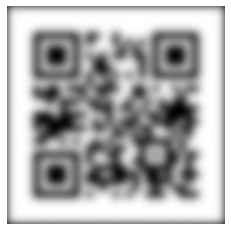

In [32]:
alpha = 0.01
T_3 = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))    
y = T_3.dot(x_vect) 
y_hat = y + np.random.normal(0,0.1,(y.shape[0]))

blurred_qr_img = np.reshape(y_hat, (x.shape[0],x.shape[0]), order='C').real
plt.imshow(blurred_qr_img, cmap="gray")
plt.axis("off")

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.

    $\hat{y}$ is a convolution with an added white noise ($\mu = 0$). This means that the generic CGrad under no  circumstances would converge to a proper solution with a good tolerance, as the initial data is somewhat corrupted. This implies that the first Hadamard criterion is violated: the existence of a solution is not guaranteed. \

- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

    There are some tips one can use to properly CGrad a solution:
    - Filter out the know noise 
    - As the problem is now somewhat ill-posed (violated criterion on an existence of a solution), one can introduce an additional regularization. 

In [ ]:
tolerance = 1e-5
# x_deconv, niter  = solve_sparse(T_3, y_hat, tolerance)
x_deconv, conv_info  = spla.cg(T_3, y_hat, 
                               tol=tolerance, 
                               maxiter=1e3)
conv_info

1000

In [38]:
 np.linalg.norm(x_vect - x_deconv)/np.linalg.norm(x_vect)

122966.04770926996

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:
def T_lmbda_matvec(x, aplha, lmbda):
    pass

# your code is here

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here